Data Set Information:
The dataset contains information about the number of cars parked in 30 parking areas around Birmingham at different times of the day between October to December 2016.

The information in the dataset can be used to understand driving patterns of Birmingham with respect to time and date and be used for efficient planning of new parking facilities.

Occupancy rates (8:00 to 16:30) from 2016/10/04 to 2016/12/19


Attribute Information:

SystemCodeNumber: Car park ID

Capacity: Car park capacity

Occupancy: Car park occupancy rate

LastUpdated: Date and Time of the measure

# Data analysis and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [4]:
df['SystemCodeNumber'].unique()

array(['BHMBCCMKT01', 'BHMBCCPST01', 'BHMBCCSNH01', 'BHMBCCTHL01',
       'BHMBRCBRG01', 'BHMBRCBRG02', 'BHMBRCBRG03', 'BHMBRTARC01',
       'BHMEURBRD01', 'BHMEURBRD02', 'BHMMBMMBX01', 'BHMNCPHST01',
       'BHMNCPLDH01', 'BHMNCPNHS01', 'BHMNCPNST01', 'BHMNCPPLS01',
       'BHMNCPRAN01', 'Broad Street', 'Bull Ring', 'NIA Car Parks',
       'NIA North', 'NIA South', 'Others-CCCPS105a', 'Others-CCCPS119a',
       'Others-CCCPS133', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


у LastUpdated тип объект, но должен был быть datetime 

PercentOccupied — отношение занятости к вместимости. Мы хотим убедиться, что эти значения находятся в диапазоне от 0% до 100%.

date — только компонент даты LastUpdated. Используется для проверки данных.

DayOfWeek — целое число, представляющее день недели. (1 = понедельник)

Date_Time_HalfHour - это поле будет каждый раз округляться до ближайшего получаса. Это поможет, когда мы агрегируем данные по всем стоянкам.

time — только компонент времени Date_Time_HalfHour. Используется для проверки данных.

In [6]:
df['LastUpdated'] = df['LastUpdated'].astype('datetime64')
df['PercentOccupied'] = df['Occupancy'] / df['Capacity']
df['date'] = df['LastUpdated'].dt.date
df['DayOfWeek'] = df['LastUpdated'].dt.dayofweek
df['date_time_halfhour'] = df['LastUpdated'].dt.round('30min')
df['time'] = df['date_time_halfhour'].dt.time

In [7]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,PercentOccupied,date,DayOfWeek,date_time_halfhour,time
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,0.105719,2016-10-04,1,2016-10-04 08:00:00,08:00:00
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,0.110919,2016-10-04,1,2016-10-04 08:30:00,08:30:00
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,0.138648,2016-10-04,1,2016-10-04 09:00:00,09:00:00
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,0.185442,2016-10-04,1,2016-10-04 09:30:00,09:30:00
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,0.259965,2016-10-04,1,2016-10-04 10:00:00,10:00:00


In [8]:
df.describe()

,Capacity,Occupancy,PercentOccupied,DayOfWeek
count,35717.000000,35717.000000,35717.000000,35717.000000
mean,1397.550130,642.228911,0.493338,2.889044
std,1179.326833,656.955535,0.271353,1.994149
min,220.000000,-8.000000,-0.016667,0.000000
25%,500.000000,210.000000,0.255881,1.000000
50%,849.000000,446.000000,0.471872,3.000000
75%,2009.000000,798.000000,0.717504,5.000000
max,4675.000000,4327.000000,1.041344,6.000000


In [9]:
df.groupby('time').size()

time
07:30:00      30
08:00:00    2096
08:30:00    1971
09:00:00    1953
09:30:00    1983
10:00:00    1987
10:30:00    1985
11:00:00    1961
11:30:00    1988
12:00:00    1976
12:30:00    1982
13:00:00    1988
13:30:00    1958
14:00:00    1984
14:30:00    1989
15:00:00    1986
15:30:00    1985
16:00:00    1956
16:30:00    1959
dtype: int64

In [10]:
import datetime

Так как нам нужно время с 8:00 до 16:30, мы должны дропнуть время за пределы этого значения

In [11]:
df.drop(df[df['time'] == datetime.time(7, 30)].index, inplace = True)

In [12]:
df[df.duplicated()]

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,PercentOccupied,date,DayOfWeek,date_time_halfhour,time
397,BHMBCCMKT01,577,57,2016-10-28 08:16:41,0.098787,2016-10-28,4,2016-10-28 08:30:00,08:30:00
433,BHMBCCMKT01,577,43,2016-10-30 07:59:55,0.074523,2016-10-30,6,2016-10-30 08:00:00,08:00:00
434,BHMBCCMKT01,577,43,2016-10-30 07:59:55,0.074523,2016-10-30,6,2016-10-30 08:00:00,08:00:00
775,BHMBCCMKT01,577,35,2016-11-18 08:01:05,0.060659,2016-11-18,4,2016-11-18 08:00:00,08:00:00
901,BHMBCCMKT01,577,44,2016-11-25 08:00:57,0.076256,2016-11-25,4,2016-11-25 08:00:00,08:00:00
...,...,...,...,...,...,...,...,...,...
34802,Shopping,1920,559,2016-10-28 08:16:41,0.291146,2016-10-28,4,2016-10-28 08:30:00,08:30:00
34838,Shopping,1920,275,2016-10-30 07:59:55,0.143229,2016-10-30,6,2016-10-30 08:00:00,08:00:00
34839,Shopping,1920,275,2016-10-30 07:59:55,0.143229,2016-10-30,6,2016-10-30 08:00:00,08:00:00
35180,Shopping,1920,592,2016-11-18 08:01:05,0.308333,2016-11-18,4,2016-11-18 08:00:00,08:00:00


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
print(df['PercentOccupied'].min())
print(df['PercentOccupied'].max())


-0.016666666666666666
1.041343669250646


In [15]:
df['PercentOccupied']=df['PercentOccupied'].apply(lambda x: x if x > 0 else 0)
df['PercentOccupied']=df['PercentOccupied'].apply(lambda x: x if x < 1 else 1)


In [16]:
print(df['PercentOccupied'].min())
print(df['PercentOccupied'].max())


0.0
1.0


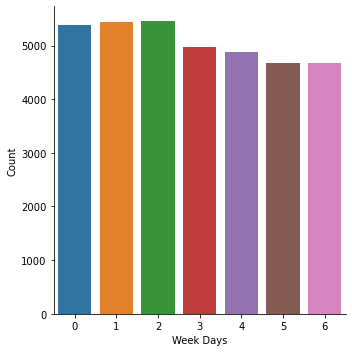

In [17]:
ax = sns.catplot(x='DayOfWeek',kind='count',data=df,orient="h")
ax.set(xlabel="Week Days", ylabel = "Count")

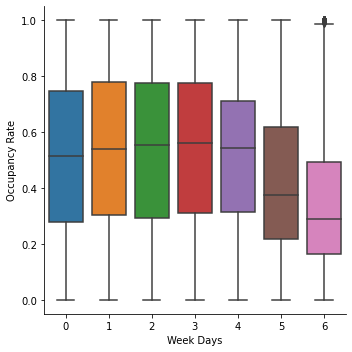

In [18]:
ax = sns.catplot(x = "DayOfWeek",y="PercentOccupied",kind='box',data=df)
ax.set(xlabel="Week Days", ylabel = "Occupancy Rate")


In [19]:
occ = []
for i in df['PercentOccupied']:
    if i <= 0.25:
        occ.append(0)
    elif i > 0.25 and i < 0.75:
        occ.append(1)
    else:
        occ.append(2)
        
        
df['Occ_cat'] = occ


In [20]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,PercentOccupied,date,DayOfWeek,date_time_halfhour,time,Occ_cat
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,0.105719,2016-10-04,1,2016-10-04 08:00:00,08:00:00,0
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,0.110919,2016-10-04,1,2016-10-04 08:30:00,08:30:00,0
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,0.138648,2016-10-04,1,2016-10-04 09:00:00,09:00:00,0
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,0.185442,2016-10-04,1,2016-10-04 09:30:00,09:30:00,0
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,0.259965,2016-10-04,1,2016-10-04 10:00:00,10:00:00,1


In [21]:
from sklearn.preprocessing import LabelEncoder
df['SystemCodeNumber'] = LabelEncoder().fit_transform(df['SystemCodeNumber'])
df['time'] = LabelEncoder().fit_transform(df['time'])

## Train Test Split and Evaluation of models

In [22]:
dropped = ['Capacity', 'Occupancy', 'LastUpdated','PercentOccupied', 'date_time_halfhour', 'date']
X = df.drop(dropped ,axis=1)
y = df['Occ_cat']

In [23]:
X

,SystemCodeNumber,DayOfWeek,time,Occ_cat
0,0,1,0,0
1,0,1,1,0
2,0,1,2,0
3,0,1,3,0
4,0,1,4,1
...,...,...,...,...
35712,29,0,13,2
35713,29,0,14,2
35714,29,0,15,1
35715,29,0,16,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier(), 
               "RandomForest": RandomForestClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(classifier.score(X_test, y_test)*100), "% accuracy score")

C:\Users\aliha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifiers:  LogisticRegression Has a training score of 100 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 98 % accuracy score
Classifiers:  SVC Has a training score of 100 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100 % accuracy score


# Finding the best hyperparameters of models

## Logistic regression

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [29]:
lr_param_grid = {
    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]
}


In [30]:
lr_grid= GridSearchCV(LogisticRegression(), lr_param_grid)

In [31]:
lr_grid.fit(X_train, y_train)

C:\Users\aliha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aliha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\aliha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aliha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]})

In [32]:
lr_grid.best_estimator_

LogisticRegression(C=0.01)

In [33]:
lr_grid_pred = lr_grid.predict(X_test)

In [34]:
print(confusion_matrix(y_test, lr_grid_pred))

[[2581    0    0]
 [   0 5730    0]
 [   0    0 2333]]


In [35]:
print(classification_report(y_test, lr_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2581
           1       1.00      1.00      1.00      5730
           2       1.00      1.00      1.00      2333

    accuracy                           1.00     10644
   macro avg       1.00      1.00      1.00     10644
weighted avg       1.00      1.00      1.00     10644



## SVC

In [36]:
svc_param_grid = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear']
                  },
                
                    ]

In [37]:
svc_clf = make_pipeline(StandardScaler(), SVC(random_state=1))



In [38]:
svc_grid = GridSearchCV(estimator=svc_clf, param_grid=svc_param_grid, verbose=3)

In [39]:
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ..svc__C=0.001, svc__kernel=linear;, score=1.000 total time=   2.0s
[CV 2/5] END ..svc__C=0.001, svc__kernel=linear;, score=1.000 total time=   2.0s
[CV 3/5] END ..svc__C=0.001, svc__kernel=linear;, score=1.000 total time=   2.0s
[CV 4/5] END ..svc__C=0.001, svc__kernel=linear;, score=1.000 total time=   2.0s
[CV 5/5] END ..svc__C=0.001, svc__kernel=linear;, score=1.000 total time=   2.0s
[CV 1/5] END ...svc__C=0.01, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 2/5] END ...svc__C=0.01, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 3/5] END ...svc__C=0.01, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 4/5] END ...svc__C=0.01, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 5/5] END ...svc__C=0.01, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 1/5] END ...svc__C=0.05, svc__kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...svc__C=0.05, svc__kernel=linear;,

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=1))]),
             param_grid=[{'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'svc__kernel': ['linear']}],
             verbose=3)

In [40]:
svc_grid.best_params_

{'svc__C': 0.001, 'svc__kernel': 'linear'}

In [41]:
svc_grid_pred = svc_grid.predict(X_test)

In [42]:
print(confusion_matrix(y_test, svc_grid_pred))

[[2581    0    0]
 [   0 5730    0]
 [   0    0 2333]]


In [43]:
print(classification_report(y_test, svc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2581
           1       1.00      1.00      1.00      5730
           2       1.00      1.00      1.00      2333

    accuracy                           1.00     10644
   macro avg       1.00      1.00      1.00     10644
weighted avg       1.00      1.00      1.00     10644



## Decision Tree

In [44]:
pipe = Pipeline((
    ('std_sc', StandardScaler()), 
    ('dec_tree', DecisionTreeClassifier())
))

In [45]:
criterion = ['gini', 'entropy']

In [46]:
dec_tree_param = [{
    'dec_tree__criterion': criterion, 
    'dec_tree__max_depth': [2, 4, 6, 8, 10]
}]

In [47]:
dec_tree_grid = GridSearchCV(pipe, dec_tree_param)

In [48]:
dec_tree_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=(('std_sc', StandardScaler()),
                                       ('dec_tree', DecisionTreeClassifier()))),
             param_grid=[{'dec_tree__criterion': ['gini', 'entropy'],
                          'dec_tree__max_depth': [2, 4, 6, 8, 10]}])

In [49]:
dec_tree_grid.best_estimator_

Pipeline(steps=[('std_sc', StandardScaler()),
                ('dec_tree', DecisionTreeClassifier(max_depth=2))])

In [50]:
dec_tree_grid_pred = dec_tree_grid.predict(X_test)

In [51]:
print(confusion_matrix(y_test, dec_tree_grid_pred))

[[2581    0    0]
 [   0 5730    0]
 [   0    0 2333]]


In [52]:
print(classification_report(y_test, dec_tree_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2581
           1       1.00      1.00      1.00      5730
           2       1.00      1.00      1.00      2333

    accuracy                           1.00     10644
   macro avg       1.00      1.00      1.00     10644
weighted avg       1.00      1.00      1.00     10644



## RandomForestClassifier

In [ ]:
RF = make_pipeline(RandomForestClassifier())
param_grid_rfc = [{
    'randomforestclassifier__max_depth':[2, 4, 6, 8, 10],
    'randomforestclassifier__max_features':[2, 3, 4, 5]
}]
rf_grid = GridSearchCV(estimator=RF,
                     param_grid = param_grid_rfc,
                     n_jobs=-1)
rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid.best_estimator_

In [ ]:
rf_pred = rf_grid.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))